Neste notebook serão trabalhados os dados da tabela 'DADOS_ABERTOS_MEDICAMENTOS'. Serão aplicados filtros para selecionar os medicamentos das classes de interesse (antimicrobianos e psicotropicos) e também os que estão com o registro válido.

In [34]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# carregando a lista dos medicamentos de interesse
lista_medicamentos = pd.read_excel('lista_medicamentos.xlsx')

In [3]:
# carregando a tabela dos medicamentos organizada pela ANVISA
medicamentos_dados = pd.read_excel('DADOS_ABERTOS_MEDICAMENTOS.xlsx')

In [4]:
# filtrando os medicamentos com o registro válido
med_registro_val = medicamentos_dados.loc[medicamentos_dados['SITUACAO_REGISTRO']=='VÁLIDO']

In [5]:
# verificando quantas e quais classes terapeuticas diferentes a tabela possui
classe_terapeutica = med_registro_val['CLASSE_TERAPEUTICA'].unique()

In [6]:
# preparando uma lista com as classes que serão excluídas
# ao invés disso, podemos fazer o inverso e selecionar as classes de interesse
para_excluir = ['ANALGESICOS NAO NARCOTICOS', 'ANTIAGREGANTE PLAQUETARIO',
                'AGENTES ANTINEOPLÁSICOS', 'OUTROS PRODUTOS PARA O APARELHO DIGESTIVO E METABOLISMO',
                'ANTI-HIPERTENSIVOS', 'EXPECTORANTES SIMPLES + FITOTERAPICO SIMPLES',
                'EXPECTORANTES + FITOTERAPICO SIMPLES', 'VITAMINAS E SUPLEMENTOS MINERAIS',
                'BRONCODILATADORES', 'ANTINFLAMATORIOS', 'MEDICAMENTOS ATIVOS NA SECRECAO GORDUROSA',
                'ANTINEOPLASICO','HORMONIOS SEXUAIS EXCLUSIVE OCITOCICOS', 'ESTROGENOS ASSOCS  A OUTROS FARMACOS EXCLUSIVE ANDROGENOS',
                'ANDROGENOS SIMPLES', 'ANTICONCEPCIONAIS', 'CERATOLITICOS E CERATOPLASTICOS', 'GLICOCORTICOIDES TOP. SIMP. EXC. USO OFTALM.',
                'GLICOCORTICOIDES TOPICO OFTALMOLOGICO SIMPLES', 'ELETROLITOS SIMPLES', 'GLICOCORTICOIDES SISTEMICOS',
                'ANALGESICOS', 'EXPECTORANTES BALSAMICOS E MUCOLITICO', 'ANTINFECCIOSOS TOPICOS-ASSOCIACOES MEDICAMENTOSAS',
                'VITAMINAS', 'SUPRESSORES DA REABSORCAO OSSEA', 'ANTIANEMICOS', 'ANTINFLAMATORIOS + FITOTERAPICO SIMPLES',
                'ANTINFLAMATORIOS ANTIREUMATICOS', 'ANTIFIBRINOLITICOS', 'PRODUTOS ANTI-ACNE',
                'ANTI-HISTAMINICOS SISTEMICOS', 'ANTICOAGULANTES FIBRINOLITICOS E PROTEOLITICOS N/DIGE',
                'OUTROS MEDICAMENTOS COM ACAO NO APARELHO VISUAL', 'EMOLIENTES E PROTETORES OFTALMICOS',
                'EMOLIENTES E PROTETORES DA PELE E MUCOSAS', 'POLIVITAMINICOS SEM MINERAIS',
                'ANTIANGINOSOS E VASODILATADORES', 'NUTRIENTES PARENTERAIS', 'ANALOGO SINTETICO DA VITAMINA D',
                'OUTROS PRODUTOS COM ACAO NO MIOCARDIO E SISTEMA DE CONDUCAO', 'MEDICAMENTOS DINAMIZADOS COMPOSTOS',
                'GLICOCORTICOIDES TOPICOS - ASSOCIACAO MEDICAMENTOSA', 'ANTIACIDOS E ANTIULCEROSOS', 'ANTIDIABETICOS',
                'MEDICAMENTOS C/ ACAO NO MIOCARDIO', 'OUTROS PRODUTOS QUE ATUAM NO SANGUE E HEMATOPOIESE',
                'ANTIANEMICOS SIMPLES', 'DESCONGESTIONANTES NASAIS TOPICOS', 'OUTROS PRODUTOS ANTI-HEMORRAGICOS',
                'PRODUTOS PARA OROFARINGE', 'LAXANTES IRRITANTES OU ESTIMULANTES', 'LAXANTES INCREMENTADORES DO BOLO INTESTINAL',
                'OUTROS AGENTES ANTINEOPLÁSICOS', 'FITOTERAPICO COMPOSTO', 'DILUENTES E VEICULOS DE MEDICAMENTOS',
                'VASODILATADORES', 'ANTIASMATICOS', 'ANTIEMÉTICOS E ANTINAUSEANTES', 'PROGESTAGENOS SIMPLES',
                'FRACOES DO SANGUE OU PLASMA EXCETO GAMAGLOBULINA', 'SANGUE, DERIVADOS E SUBSTITUTOS EXCETO IMUNOPROTECAO',
                'PRODUTOS PARA DIAGNOSTICO POR IMAGEM', 'COLAGOGOS E COLERETICOS + FITOTERAPICO SIMPLES', 'COLAGOGOS E COLERETICOS',
                'DIURETICOS', 'ANTI-HIPERTENSIVOS SIMPLES', 'ENZIMA PARA REPOSIÇAO', 'CORTICOSTEROIDES TOPICOS',
                'ANTIALERGICOS', 'ANTIALOPECIA', 'IMUNOMODULADOR', 'OUTROS PRODUTOS COM ACAO IMUNOPROTETORA',
                'ANTIESPASMODICOS', 'ANTIINFLAMATÓRIOS E ANTIREUMÁTICOS', 'ANTICOAGULANTES + ANTINFLAMATORIOS',
                'RUBEFACIENTES', 'ANTINEOPLASICOS CITOTOXICOS', 'DESCONGESTIONANTES NASAIS SISTEMICOS', 'ANTI-HISTAMÍNICOS PARA USO SISTÊMICO',
                'ANTIGOTOSOS', 'ANTIGLAUCOMATOSOS', 'ANESTESICOS LOCAIS', 'OUTROS DERIVADOS DO SANGUE E SUBSTITUTOS',
                'VITAMINA D E ANÁLOGOS', 'ANTIARRITMICOS', 'OUTROS LAXANTES', 'PRODUTOS PARA TERAPIA NASAL DE ACAO ESPECIFICA',
                'RELAXANTES MUSCULARES CENTRAIS-ASSOCIACOES MEDICAMENTOSAS', 'ASSOCIACAO DE FARMACOS COM ACAO DIURETICA',
                'ANDROGENOS SIMPLES + FITOTERAPICO SIMPLES', 'ANTI-HIPERTENSIVOS-ASSOCIACOES MEDICAMENTOSAS',
                'ANTIEMETICOS E ANTINAUSEANTES', 'ANTIULCEROSOS', 'ANTISSEPTICO', 'ESTROGENOS SIMPLES', 'ANTITUSSIGENOS SIMPLES',
                'FITOTERAPICO SIMPLES', 'ESTIMULANTES DO APETITE', 'ANTITROMBOTICO', 'OUTROS PRODUTOS PARA USO EM GINECOLOGIA E OBSTETRICIA',
                'PRODUTOS PARA TERAPIA SINTOMATICA DA GRIPE', 'HIPERTENSOR', 'OUTROS PRODS  NAO ENQUADRADOS EM CLASSE TERAPEUTICA ESPECIF',
                'VITAMINAS OU MINERAIS ASSOCIADOS A OUTROS FARMACOS', 'MEDICAMENTOS DINAMIZADOS DE COMPONENTE ÚNICO',
                'ANTINFLAMATORIOS ANTIREUMATICOS + FITOTERAPICO SIMPLES', 'MEDICAMENTOS COM ACAO NO APARELHO VISUAL',
                'UNGUENTOS PERCUTANEOS E INALANTES', 'PRODUTOS PARA USO EM CIRURGIA', 'OUTROS PRODUTOS COM ACAO NO SISTEMA MUSCULO ESQUELETICO',
                'ANTINFLAMATORIOS ANTIREUMATICOS + CETOPROFENO', 'OUTROS MEDICAMENTOS DE ACAO NO APARELHO CARDIOVASCULAR',
                'ANTILIPEMICOS', 'AGENTES ANTINEOPLÁSICOS E IMUNOMODULADORES', 'ANTIESPASMODICOS E ANTICOLINERGICOS GASTRINTESTINAIS',
                'MIDRIATICOS', 'REMOVEDORES DE SECRECAO DO CONDUTO AUDITIVO EXTERNO', 'ANTIDIARREICOS SIMPLES SEM ACAO ANTIMICROBIANA',
                'INIBIDOR DA ALFA-REDUTASE', 'BIFOSFONATOS , ASSOCIAÇÕES', 'OUTROS HORMONIOS MEDIADORES E PRODUTOS EQUIVALENTES',
                'SOLUÇÕES QUE AJUSTAM O BALANÇO ELETROLÍTICO', 'OUTROS AGENTES HEMATOLÓGICOS', 'SUBSTITUTOS DO PLASMA E EXPANSORES PLASMATICOS', 'AGENTES ANTINEOPLÁSICOS + AGENTES ANTINEOPLÁSICOS E IMUNOMODULADORES + OUTROS AGENTES ANTINEOPLÁSICOS',
                'ANTINFLAMATORIOS E ANTIREUMATIOS-ASSOCS  MEDICAMENTOSAS', 'AGENTES ANTIINFLAMATÓRIOS/ANTIREUMÁTICOS EM ASSOCIAÇÃO',
                'PROSTAGLANDINAS', 'POLIVITAMINICOS COM MINERAIS', 'REPOSICAO HIDROELETROLITICA E ALIMENTACAO PARENTERAL',
                'RELAXANTES MUSCULARES CENTRAIS SIMPLES', 'CONTRASTES RADIOLOGICOS', 'ENEMAS', 'PRODUTOS PARA VIAS URINARIAS',
                'OUTROS PRODUTOS COM ACAO NA PELE E MUCOSAS', 'ANTITUSSIGENOS-ASSOCIACOES MEDICAMENTOSAS',
                'ANTITUSSIGENOS', 'ANTI-HEMORRAGICOS', 'MONOVITAMINAS EXCETO VITAMINA K', 'IMUNODEPRESSOR',
                'RELAXANTES MUSCULARES', 'GLICOCORTICOIDES SISTEMICOS-ASSOCIACOES MEDICAMENTOSAS', 'ANTIVERTIGINOSOS',
                'PRODUTOS A BASE DE VIT  B 12-ASSOCIACOES MEDICAMENTOSAS', 'ADRENÉRGICOS, PARA INALAÇÃO',
                'PRODUTO P.TERAPIA SINTOMATICA DA GRIPE', 'PRODUTOS PARA DIALISE', 'MEDICACAO PARA TRATAMENTO DA ACIDOSE METABOLICA',
                'MEDICACAO PARA TRATAMENTO DA ACIDOSE METABOLICA + PRODUTOS PARA TERAPIA DE INTOXICACOES',
                'CONCENTRADOS PARA HEMODIÁLISE', 'DIURETICOS ASSOCIADOS A BETABLOQUEADORES', 'AGENTES ANTINEOPLÁSICOS + ANTICORPOS MONOCLONAIS + RITUXIMABE',
                'HORMONIO RECOMBINANTE DO CRESCIMENTO HUMANO', 'AGENTES ANTINEOPLÁSICOS + ANTICORPOS MONOCLONAIS',
                'CITOSTATICOS ALQUILANTES', 'AGENTES ANTI-INFLAMATÓRIOS + FITOTERAPICO SIMPLES', 'ANTIANEMICOS A BASE DE FERRO - ASSOCIACOES MEDICAMENTOSAS',
                'VASODILATADORES CEREBRAIS', 'DERIVADOS DO SANGUE E SUBSTITUTOS', 'EXPECTORANTES', 'OUTROS COADJUVANTES DO TRATAMENTO DA DIARREIA',
                'PRODUTOS PARA HEMODIALISE', 'LAXANTES', 'OUTROS PRODUTOS COM ACAO NO APARELHO CARDIOVASCULAR',
                'EXPECTORANTES SIMPLES', 'IMUNOGLOBULINAS', 'AGENTE PARALISANTE NEUROMUSCULAR', 'INIBIDORES DA PROTEÍNA QUINASE ',
                'AMINOGLICOSIDEOS', 'BLOQUEADOR NEUROMUSCULAR', 'OUTROS PRODUTOS COM ACAO NO TRATO URINARIO',
                'OUTROS PRODUTOS PARA O APARELHO RESPIRATORIO', 'COADJUVANTE NO TRATAMENTO DO CLIMATERIO', 'ANTITABAGICO',
                'REIDRATANTES PARENTERAIS', 'AGENTES DIAGNOSTICOS RADIOATIVOS', 'ANTINEOPLASICOS CITOTOXICOS + SULFONATOS DE ALQUILA',
                'AGENTES ANTINEOPLÁSICOS + INIBIDORES DA PROTEÍNA QUINASE ', 'ANTIALERGICOS TOPICOS', 'HORMONIO HIPOCALCEMICO',
                'PRODUTOS A BASE DE CALCIO-ASSOCIACOES MEDICAMENTOSAS', 'DIGESTIVOS-ASSOCIACOES MEDICAMENTOSAS + FITOTERAPICO COMPOSTO',
                'OUTROS ANTINEOPLASICOS', 'IODOTERAPIA', 'GLICOSIDEOS CARDIACOS', 'COLAGOGOS, COLERETICOS E HEPATOPROTETORES',
                'POLIVITAMINICOS + SAIS MINERAIS', 'PRODUTOS PARA TERAPIA DE INTOXICACOES', 'ANTIVARICOSOS DE ACAO SISTEMICA',
                'ANTIVARICOSOS DE ACAO SISTEMICA + FITOTERAPICO SIMPLES', 'FITOTERAPICO COMPOSTO + MEDICACAO ENERGETICA',
                'DIURETICOS + FITOTERAPICO SIMPLES', 'ANALGESICOS CONTRA ENXAQUECA', 'IMUNOSUPRESSOR',
                'FITOTERAPICO SIMPLES + OUTROS PRODUTOS COM ACAO NO APARELHO CARDIOVASCULAR', 'AGENTE IMUNOSUPRESSOR',
                'OUTROS ANTIALERGICOS', 'HORMONIOS DA HIPOFISE', 'HEPATOPROTETORES E LIPOTROPICOS', 'CICATRIZANTES',
                'ANTIMETABOLICOS ANALOGOS DA PIRIMIDINA', 'NITROSUREIAS ALQUILANTES', 'DESCONGESTIONATES OFTALMICOS',
                'DESMELANIZANTES', 'COADJUVANTE NO TRATAMENTO DO CLIMATERIO + FITOTERAPICO SIMPLES',
                'ANTIAGREGANTE PLAQUETARIO + OUTROS MEDICAMENTOS DE ACAO NO APARELHO CARDIOVASCULAR', 'DIURETICOS SIMPLES',
                'ELETRÓLITOS', 'SOLUCOES ISOSMOTICAS SALINAS SIMPLES', 'ANTIPARATIREOIDEANOS', 'VASOCONSTRITORES E HIPERTENSORES',
                'AGENTES BETABLOQUEADORES', 'FITOTERAPICO SIMPLES + OUTROS PRODUTOS QUE ATUAM SOBRE O SISTEMA NERVOSO',
                'PRODUTOS GINECOLOGICOS TOPICOS', 'COMPLEXO VITAMÍNICO B (SOMENTE)',
                'MEDICAMENTOS DINAMIZADOS COMPOSTOS + OUTROS PRODUTOS COM ACAO NO TRATO URINARIO',
                'PREPARAÇÕES ANTIOBESIDADE, EXCLUINDO PRODUTOS DIETÉTICOS', 'ORLISTATE', 'HORMONIOS CORTICOSTEROIDES',
                'ENZIMAS DIGESTIVAS', 'ANTIDIARREICOS', 'PRODUTO PARA O APARELHO RESPIRATORIO', 'MODULADORES DO METABOLISMO E DA DIGESTAO',
                'AGENTES ANTI-INFLAMATÓRIOS', 'HORMONIO GONADOTROFICO', 'OUTROS MEDICAMENTOS ANTIASMATICOS',
                'ANTIESPASMODICOS + FITOTERAPICO SIMPLES', 'OUTROS MEDICAMENTOS AFETANDO A ESTRUTURA E A MINERALIZAÇÃO ÓSSEA',
                'AGENTES ANTITROMBÓTICOS', 'ANTICORPOS MONOCLONAIS', 'ANABOLIZANTES SIMPLES', 'OUTRAS PREPARACOES PARA TERAPIA SINTOMATICA NASAL',
                'ANTINEOPLASICO + SUPRESSORES DA REABSORCAO OSSEA', 'AGENTE QUELANTE DE FERRO',
                'CORTICOSTEROIDES TOPICOS + HORMONIOS CORTICOSTEROIDES', 'SOLUCOES PARA DIALISE PERITONIAL',
                'ANTIDIARREICOS ADSORVENTES E ANTIFISETICOS', 'OUTROS DIGESTIVOS', 'DIGESTIVO ANTIMETICOS E ANTINAUSEANTES',
                'ANTIACIDO', 'OUTROS ANTIANGINOSOS', 'ANALGESICOS NAO NARCOTICOS + ANTINFLAMATORIOS ANTIREUMATICOS',
                'ANTIACIDOS E ANTIULCEROSOS SIMPLES', 'VÁRIOS PRODUTOS PARA O TRATO ALIMENTAR E METABOLISMO',
                'ANALGESICOS + ANALGESICOS NAO NARCOTICOS', 'ANTIACIDOS E ANTIULCEROSOS ASSOCIADOS', 'FITOTERAPICO COMPOSTO + LAXANTES',
                'LAXANTES SUAVIZADORES OU EMOLIENTES', 'ANDROGENOS-ASSOCIACOES MEDICAMENTOSAS',
                'PREPARAÇÕES HORMONAIS PARA USO SISTÊMICO, EXCLUINDO HORMÔNIOS SEXUAIS E INSULINAS',
                'SOLVENTES E AGENTES DILUENTES, INCLUINDO SOLUÇÕES PARA IRRIGAÇÃO', 'ADRENÉRGICOS, PARA INALAÇÃO + AGENTES CONTRA DOENÇAS OBSTRUTIVAS DAS VIAS AÉREAS + SISTEMA RESPIRATÓR',
                'OUTROS AGENTES IMUNOSSUPRESSORES + PIFENIDONA', 'MEDICAMENTOS COM ACAO NO APARELHO AUDITIVO',
                'OUTRAS PREPARAÇÕES ANTIENXAQUECA', 'FITOTERAPICO SIMPLES + IMUNOMODULADOR', 'COLAGOGOS E COLERETICOS + FITOTERAPICO COMPOSTO',
                'FITOTERAPICO SIMPLES + IMUNOESTIMULANTES', 'OCITOCICOS NAO HORMONAIS', 'ANTIVARICOSOS TOPICOS',
                'VITAMINA K SIMPLES OU EM ASSOCIACOES MEDICAMENTOSAS', 'ADSORVENTES E ANTIFISETICOS INTESTINAIS SIMPLES',
                'GLICOCORTICOIDES TOP. SIMP. EXC. USO OFTALM. + GLICOCORTICOIDES TOPICOS - ASSOCIACAO MEDICAMENTOSA',
                'ANTIULCEROSOS + FITOTERAPICO SIMPLES', 'ANTIACIDOS E ANTIULCEROSOS SIMPLES + FITOTERAPICO SIMPLES',
                'ESCLEROSANTES E COAGULANTES', 'OUTROS ANTIANEMICOS', 'HORMONIOS TIREOIDEANOS SIMPLES OU ASSOCIADOS ENTRE SI',
                'OUTROS MEDICAMENTOS PARA TRANSTORNOS DO SISTEMA MÚSCULO-ESQUELÉTICO', 'ALERGENOS', 'IMUNOSSUPRESSORES SELETIVOS',
                'AGENTES QUE ATUAM NO SISTEMA RENINA-ANGIOTENSINA', 'AGENTES ANTINEOPLÁSICOS + ANTIANDRÓGENOS',
                'ANTIMETABOLICOS ANTAGONISTAS DO ACIDO FOLICO', 'COLAGOGOS, COLERETICOS E HEPATOPROTETORES + FITOTERAPICO COMPOSTO',
                'FITOTERAPICO SIMPLES + OUTROS PRODUTOS PARA O APARELHO RESPIRATORIO', 'CICATRIZANTES + FITOTERAPICO SIMPLES',
                'COADJUVANTE NO TRATAMENTO DO CLIMATERIO + FITOTERAPICO COMPOSTO', 'REIDRATANTES ORAIS', 'MINERALOCORTICOIDES',
                'PROFILATICOS DA CARIE', 'ANTIMETABOLICOS ANALOGOS DA PURINA', 'ANTIDOTOS', 'HORMONIO PARATIREOIDIANO',
                'DIURETICOS ASSOC  A OUTROS FARMACOS EXCL  ANTI-HIPERTENSIVOS', 'ANALGESICOS + FITOTERAPICO SIMPLES',
                'MEDICACAO HEMOSTATICA', 'ANTIEMETICOS E ANTINAUSEANTES + FITOTERAPICO SIMPLES', 'FITOTERAPICO SIMPLES + GINKGO BILOBA',
                'FITOTERAPICO SIMPLES + VASODILATADORES', 'ANTIAGREGANTE PLAQUETARIO + FITOTERAPICO SIMPLES + VASODILATADORES',
                'ANTIAGREGANTE PLAQUETARIO + ANTIVERTIGINOSOS + VASODILATADORES CEREBRAIS', 'HIPOGLICEMIANTE ORAL',
                'OUTRAS SOL P/ REPOS  HIDROELETROLITICA E ALIM  PARENTERAL', 'BRONCODILATADORES + EXPECTORANTES',
                'ANTICOAGULANTES', 'PROTECAO, APARENCIA E CICATRIZACAO DA PELE E MUCOSAS', 'SANGUE TOTAL OU PLASMA',
                'ANTIVARICOSOS TOPICOS + FITOTERAPICO SIMPLES', 'PRODUTOS NAO ENQUADRADOS EM CLASSES TERAPEUTICAS',
                'COLAGOGOS, COLERETICOS E HEPATOPROTETORES + FITOTERAPICO SIMPLES', 'CREME DERMATOLOGICO',
                'FITOMENADIONA', 'OUTROS HEMOSTÁTICOS SISTÊMICOS', 'ANALGESICOS NAO NARCOTICOS + ANTINFLAMATORIOS + ANTINFLAMATORIOS ANTIREUMATICOS',
                'IMUNOGLOBULINAS HUMANAS NORMAIS', 'IMUNOESTIMULANTES', 'VASODILATADORES PERIFERICOS', 'MEDICAMENTOS PARA ÚLCERA PÉPTICA E DOENÇAS DE REFLUXO GASTRESOFÁGICO',
                'NITRITOS NITRATOS E SEMELHANTES', 'PRODUTOS PARA DIETAS ESPECIAIS', 'FITOTERAPICO SIMPLES + PRODUTOS GINECOLOGICOS ANTINFECCIOSOS TOPICOS SIMPLES',
                'OUTROS HORMONIOS E MODULADORES DO METABOLISMO E DA DIGESTAO', 'ANALGÉSICOS', 'FITOTERAPICO SIMPLES + LAXANTES IRRITANTES OU ESTIMULANTES',
                'ANTIGLAUCOMATOSOS + MIOTICOS', 'FITOTERAPICO SIMPLES + LAXANTES', 'OUTROS AGENTES MODIFICADORES DE LIPÍDEOS',
                'DERIVADOS DO INDOL', 'OUTROS OFTALMOLÓGICOS', 'FÁRMACOS PARA O TRATAMENTO DA HIPERCALEMIA E HIPERFOSFATEMIA + TODOS OS OUTROS PRODUTOS TERAPÊUTICOS',
                'AGENTES ANTINEOPLÁSICOS E IMUNOMODULADORES + ANÁLOGOS DAS PIRIMIDINAS', 'NITROFURANICOS',
                'DEMULCENTES E OUTROS MEDS. USO ORAL P/ TRATAM. OROFARINGE', 'DIURETICOS OSMOTICO', 'EXPECTORANTES + FITOTERAPICO COMPOSTO',
                'ANTIMIASTENICOS E DESCURARIZANTES', 'ANTIALCOOLICO', 'FIBRINOLITICOS E PROTEOLITICOS', 'ANTITIREOIDEANOS',
                'ANTILIPEMICOS + FITOTERAPICO SIMPLES', 'INIBIDORES DA ENZIMA CONVERSORA DA ANGIOTENSINA, MONODROGA',
                'MEDICAMENTOS AFETANDO A ESTRUTURA ÓSSEA E MINERALIZAÇÃO', 'MEIOS DE CONTRASTE PARA IMAGENS DE RESSONÂNCIA MAGNÉTICA NUCLEAR',
                'MEDICAMENTOS AFETANDO A ESTRUTURA ÓSSEA E MINERALIZAÇÃO + VITAMINA K', 'PRODUTOS ODONTOLOGICOS',
                'OUTROS SUPLEMS  MINERAIS EXCETO DE FERRO E P/ REHIDRATACAO', 'NITISINONA', 'ANESTÉSICOS LOCAIS',
                'FITOTERAPICO SIMPLES + OUTROS PRODUTOS PARA USO EM GINECOLOGIA E OBSTETRICIA', 'ANTI-HIPERTENSIVOS SIMPLES + ANTIANGINOSOS E VASODILATADORES',
                'ANTIANDRÓGENOS', 'OCITOCICOS HORMONAIS', 'DIGESTIVOS-ASSOCIACOES MEDICAMENTOSAS', 'MELANIZANTES',
                'AGENTES ANTINEOPLÁSICOS E IMUNOMODULADORES + ANTAGONISTAS HORMONAIS E AGENTES RELACIONADOS + INIBIDOR',
                'OUTROS PRODUTOS PARA O SISTEMA RESPIRATÓRIO', 'ESTIMULANTES RESPIRATORIOS', 'FITOTERAPICO COMPOSTO + OUTROS PRODUTOS COM ACAO NO SISTEMA MUSCULO ESQUELETICO',
                'MIOTICOS', 'FITOTERAPICO COMPOSTO + OUTROS DIGESTIVOS', 'FITOTERAPICO SIMPLES + LAXANTES INCREMENTADORES DO BOLO INTESTINAL',
                'ANTÍDOTOS', 'ANTI-HEMORROIDARIOS TOPICOS', 'FITOTERAPICO SIMPLES + OUTROS PRODUTOS COM ACAO NO TRATO URINARIO',
                'PRODUTOS PARA PROCEDIMENTOS ESPECIALIZADOS', 'PRODUTOS NATURAIS ASSOCIADOS', 'OUTROS AGENTES IMUNOSSUPRESSORES',
                'FITOTERAPICO SIMPLES + VASODILATADORES CEREBRAIS', 'AGENTES DIAGNOSTICOS NAO RADIOATIVOS', 'INIBIDORES DA PROTEÍNA QUINASE  + OUTROS AGENTES ANTINEOPLÁSICOS',
                'AGENTE IMUNOSUPRESSOR + IMUNOSUPRESSOR', 'FITOTERAPICOS ASSOCIADOS', 'REPOSITOR DE CALCIO',
                'HORMONIO HIPOTALAMICO-ANALOGO DA SOMATOSTATINA', 'SOROS IMUNOPROTETORES', 'VITAMINAS, OUTRAS ASSOCIAÇÕES',
                'OUTROS PRODUTOS PARA O TRATO ALIMENTAR E METABOLISMO', 'ALCALOIDE DA VINCA', 'GANGLIOSIDEO',
                'HORMONIOS DE USO TOPICO GINECOLOGICO', 'ANTINFLAMATORIOS + OUTROS PRODUTOS COM ACAO NO SISTEMA MUSCULO ESQUELETICO',
                'SOLUÇÕES PARA NUTRIÇÃO PARENTERAL', 'INIBIDORES DOS HORMÔNIOS DE CRESCIMENTO', 'OUTROS MEDICAMENTOS USADOS NO TRATAMENTO DA TUBERCULOSE',
                'OUTROS PRODUTOS DERMATOLÓGICOS', 'OUTROS PRODUTOS UROLÓGICOS EXCLUINDO ANTIESPASMÓDICOS + SISTEMA GENITOURINÁRIO E HORMÔNIOS SEXUAIS',
                'ANTIAGREGANTE PLAQUETARIO + FITOTERAPICO SIMPLES + VASODILATADORES CEREBRAIS', '4-DIMETILAMINOFENOL + ABÉTIMO',
                'ANTITUSSIGENOS SIMPLES + FITOTERAPICO SIMPLES', 'OUTROS FÁRMACOS USADOS EM TRANSTORNOS DO SISTEMA MÚSCULO-ESQUELÉTICO',
                'IMUNOSSUPRESSORES', 'INIBIDORES DA ENZIMA CONVERSORA DA ANGIOTENSINA, ASSOCIAÇÕES', 'RITUXIMABE',
                'ANTI-HIPERTENSIVOS PARA HIPERTENSÃO ARTERIAL PULMONAR', 'IMUNOESTIMULANTES, EXCLUSIVE VACINAS E IMUNOGLOBULINAS',
                'VACINAS + VACINAS CONTRA A GRIPE', 'ANÁLOGOS DA PROSTAGLANDINA', 'ISOTOPOS RADIOATIVOS ANTINEOPLASICOS',
                'ALOPURINOL + ANTIGOTOSOS', 'AGENTES RELAXANTES MUSCULARES DE AÇÃO CENTRAL', 'SUBSTANCIA SEM CLASSIFICACAO TERAPEUTICA',
                'FITOTERAPICO SIMPLES + IMUNOMODULADOR + OUTROS PRODUTOS COM ACAO NO TRATO URINARIO + PRODUTO PARA O A',
                'SOLUÇÕES SALINAS', 'ANTICORPOS MONOCLONAIS + ANTINEOPLASICOS CITOTOXICOS', 'HEMOSTÁTICOS LOCAIS',
                'ANTI-HISTAMÍNICOS PARA USO SISTÊMICO + DERIVADOS DA PIPERAZINA', 'AGENTES POUPADORES DE POTÁSSIO + ANTAGONISTAS DA ALDOSTERONA',
                'AGENTES ANTI-INFLAMATÓRIOS E ANTI-INFECCIOSOS EM ASSOCIAÇÃO', 'ADRENÉRGICOS E OUTROS AGENTES PARA DOENÇA OBSTRUTIVA DAS VIAS AÉREAS',
                'AGENTES MODIFICADORES DE LIPÍDEOS, ASSOCIAÇÕES + ANTILIPEMICOS', 'AGENTES BETABLOQUEADORES E OUTROS ANTI-HIPERTENSIVOS',
                'ANTAGONISTAS DA ANGIOTENSINA II, MONODROGA + ANTI-HIPERTENSIVOS', 'ANEL VAGINAL COM PROGESTÁGENO E ESTRÓGENO + ANTICONCEPCIONAIS',
                'ANTIANDRÓGENOS + ANTINEOPLASICO', 'OUTROS VASODILATADORES UTILIZADOS EM DOENÇAS CARDÍACAS',
                'VACINAS + VACINAS ANTIPNEUMOCOCOS', 'CONTRACEPTIVOS HORMONAIS PARA USO SISTÊMICO', 'TERAPIA BILIAR',
                'ANTAGONISTAS DO RECEPTOR H2 + ANTIACIDOS E ANTIULCEROSOS', 'ANTIÁCIDOS', 'DESCONGESTIONANTES E ANTIALÉRGICOS',
                'ANTIULCEROSOS + INIBIDORES DA BOMBA DE PRÓTONS', 'IMUNOGLOBULINAS HUMANAS NORMAIS PARA ADMINISTRAÇÃO INTRAVASCULAR', 'ANÁLOGOS DA PROSTAGLANDINA ']

In [7]:
# excluindo as classes terapeuticas que não serão utilizadas
med_filtrados = med_registro_val[~med_registro_val['CLASSE_TERAPEUTICA'].isin(para_excluir)]


In [ ]:
# verificando as classes de interesse qe foram selecionadas
med_filtrados['CLASSE_TERAPEUTICA'].unique()

In [8]:
# removendo os missing values (valores faltantes)
med_filtrados.dropna(inplace=True)

/tmp/ipykernel_17578/1245551976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_filtrados.dropna(inplace=True)


([<matplotlib.patches.Wedge at 0x7430b1e12bd0>,
 [Text(3.618456282905276, 7.27786887961455, ''),
  Text(4.381544023990957, 0.722131156108166, '')])

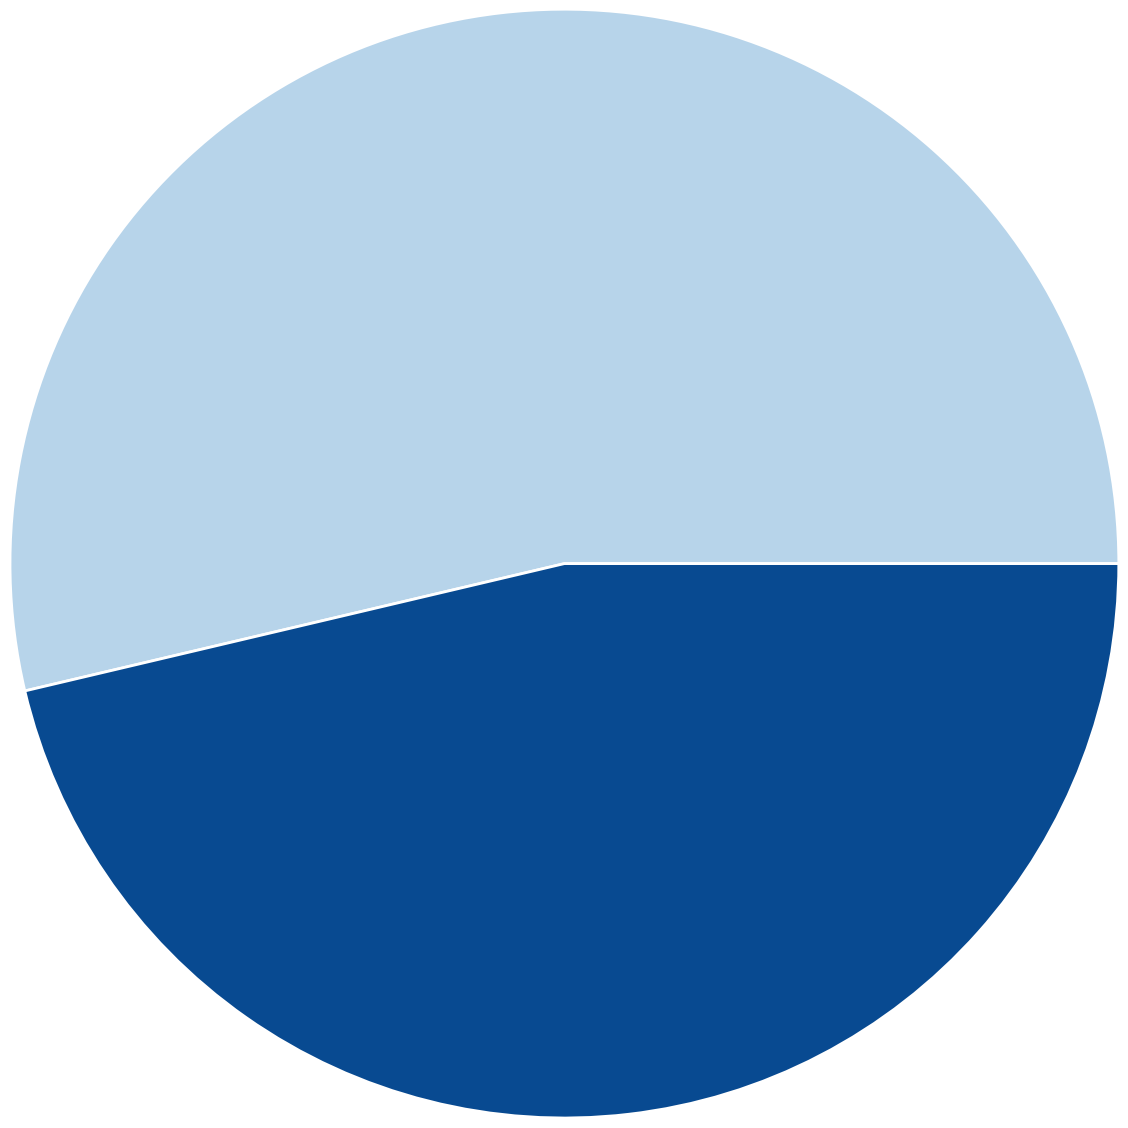

In [28]:
# gráfico de pizza ilustrando a quantidade de medicamentos de interesse
x = lista_medicamentos['Categoria'].value_counts()
colors = plt.get_cmap('Blues')(np.linspace(0.3, 0.9, len(x)))
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(x, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 2, "edgecolor": "white"})


In [30]:
# criando novo dataframe a partir da frequencia de cada classe
classes_med = pd.DataFrame(med_filtrados['CLASSE_TERAPEUTICA'].value_counts())

In [32]:
# ressetando o index para que o dataframe tenha 2 colunas
classes_med.reset_index(inplace=True)

In [45]:
classes_med.iloc['count'] != 1

TypeError: Cannot index by location index with a non-integer key

<Axes: xlabel='CLASSE_TERAPEUTICA', ylabel='count'>

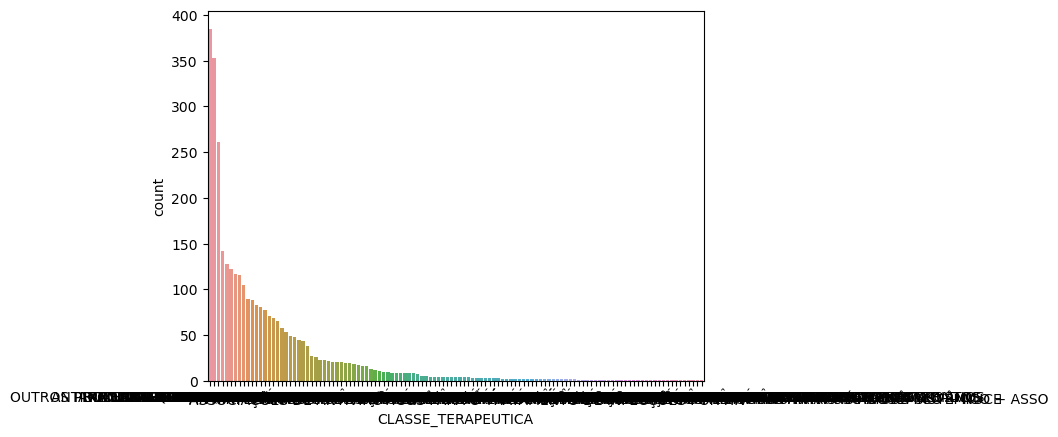

In [40]:
sns.barplot(classes_med, x="CLASSE_TERAPEUTICA", y="count")